## Atividade 5

Crie uma função para transformar uma imagem colorida em um desenho (sketch) com fundo branco e traços na cor preta.

## 1. Requerimentos

Todas as bibliotecas já estão instaladas no Google Colab.

* OpenCV >= 3.4.3
* Matplotlib >= 3.1.3
* Seaborn >= 0.0.10
* Numpy >= 1.18.1

### 1.2 Arquivos

In [1]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('Usuario fez upload da imagem "{name}" com tamanho {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Importação de bibliotecas.

In [7]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image, ImageOps, ImageFilter

## 2. Solução

Construindo função que receberá uma imagem em RGB, converterá em escala de cinza e posteriormente retornará com bordas identificadas invertidas.

In [8]:
def obter_bordas(imagem):
    image = Image.open(imagem)

    # Converter a imagem para escala de cinza
    grayscale_image = image.convert("L")

    # Inverter a imagem em escala de cinza
    inverted_image = ImageOps.invert(grayscale_image)

    # Aplicar um filtro de aresta na imagem invertida
    edges = inverted_image.filter(ImageFilter.FIND_EDGES)

    # Converter a imagem de bordas para uma matriz numpy
    sketch = np.array(edges)

    # Definir todos os valores acima de um limiar como preto
    threshold = 128
    sketch[sketch > threshold] = 255
    sketch[sketch <= threshold] = 0

    return Image.fromarray(sketch)

Text(0.5, 1.0, 'Original')

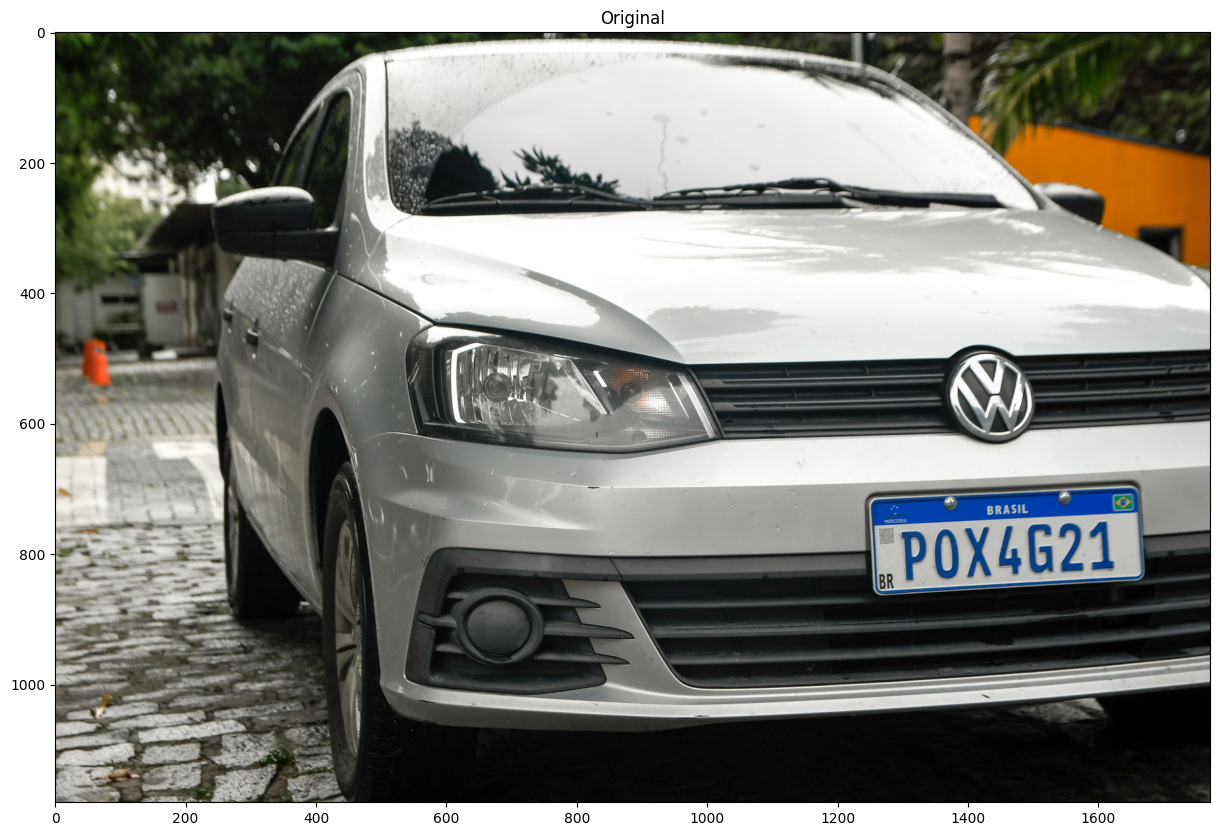

In [9]:
imagem = cv2.imread("imagens/placa.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,10))
plt.imshow(imagem)
plt.title("Original")

In [10]:
imagem = obter_bordas(r'E:\Github\Python\Faculdade\FIAP\Segundo_ano\Visao Computacional\Atividades Checkpoint - Visão Computacional\Atividade 5\imagens\placa.jpg')
imagem.save(r'E:\Github\Python\Faculdade\FIAP\Segundo_ano\Visao Computacional\Atividades Checkpoint - Visão Computacional\Atividade 5\imagens\placa_sketch.jpg')

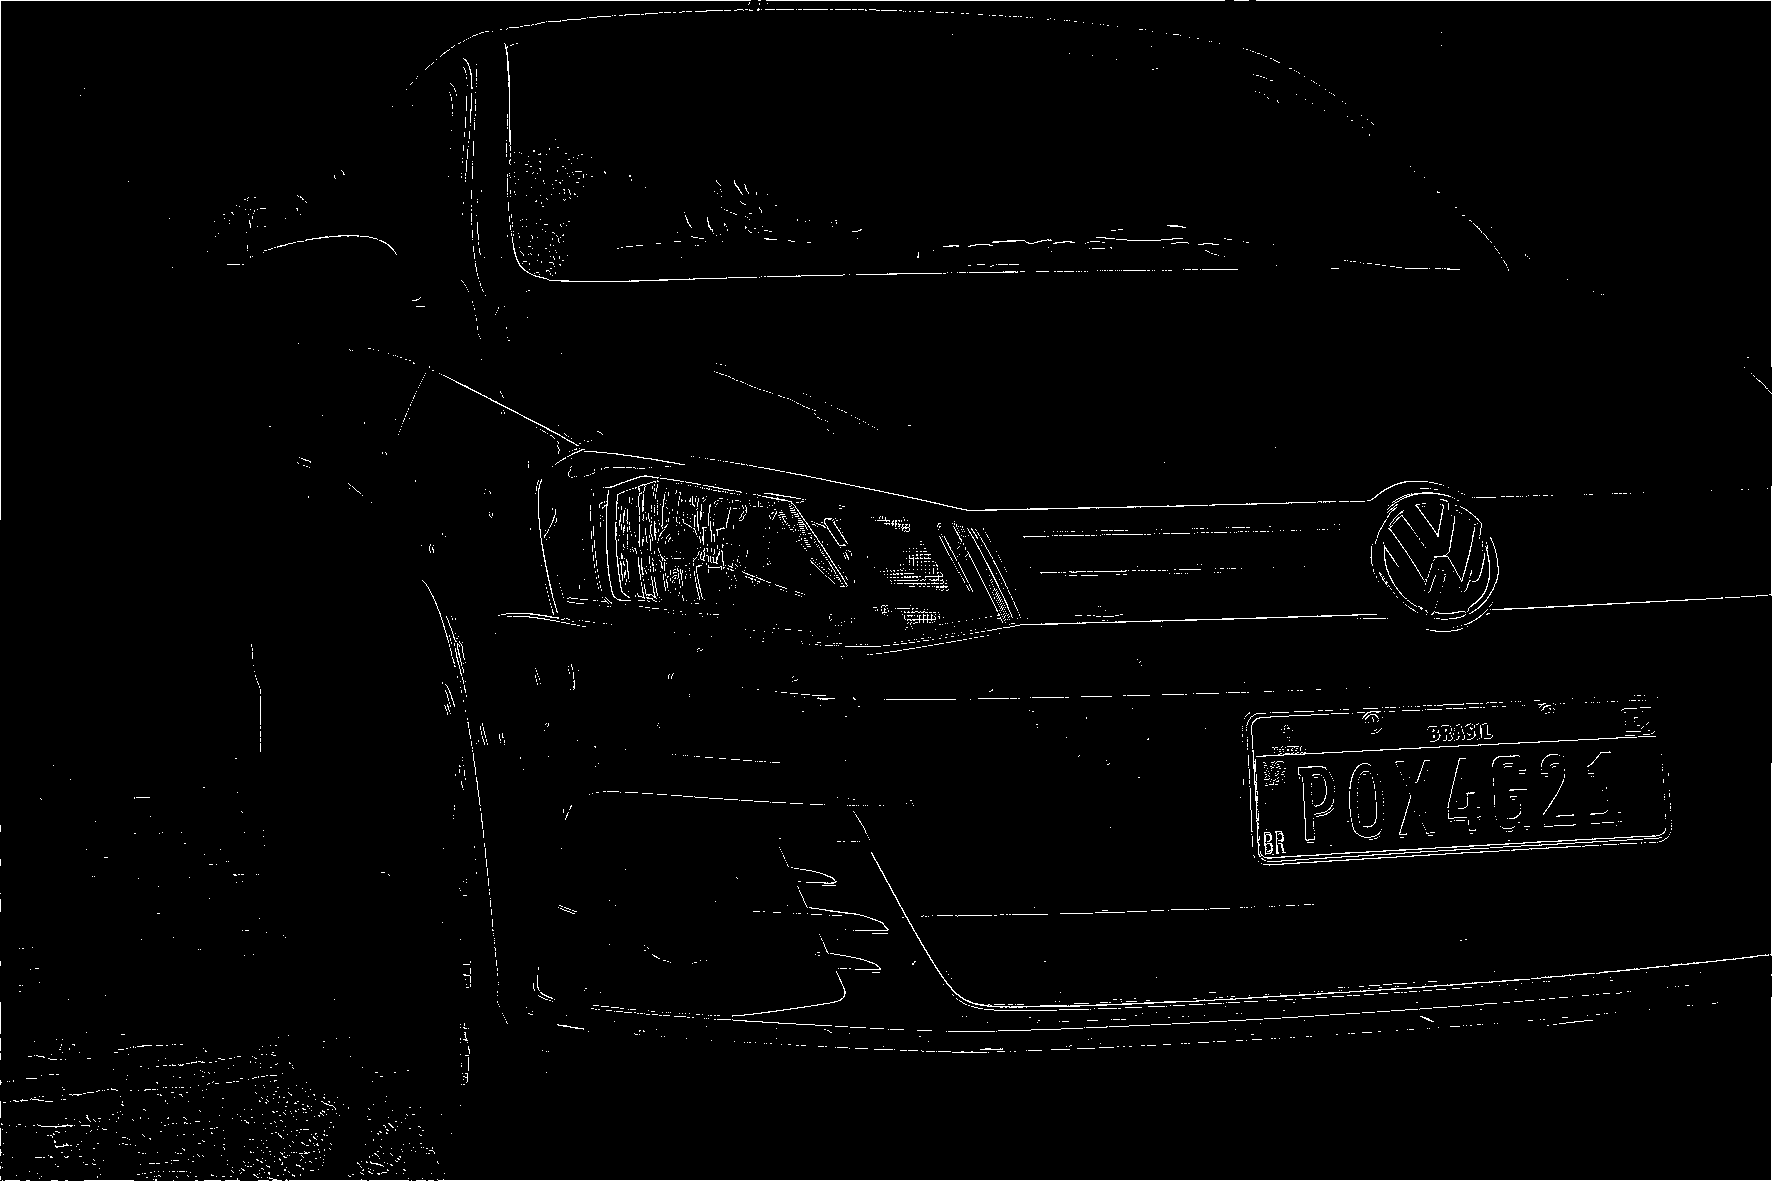

In [11]:
imagem

### 2. Obtendo imagem a da câmera

Este método é de uso exclusivo do Colab, uma vez que não temos acesso direto a câmera do dispositivo.

Obtido dos [snippets avançados](https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=buJCl90WhNfq) do Google Colab.

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Função que obtem a foto da câmera do navegador e salva em uma pasta determinada.

In [ ]:
from IPython.display import Image
try:
  filename = take_photo("imagens/foto.jpg")
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [14]:
caminho = "imagens/placa.jpg"

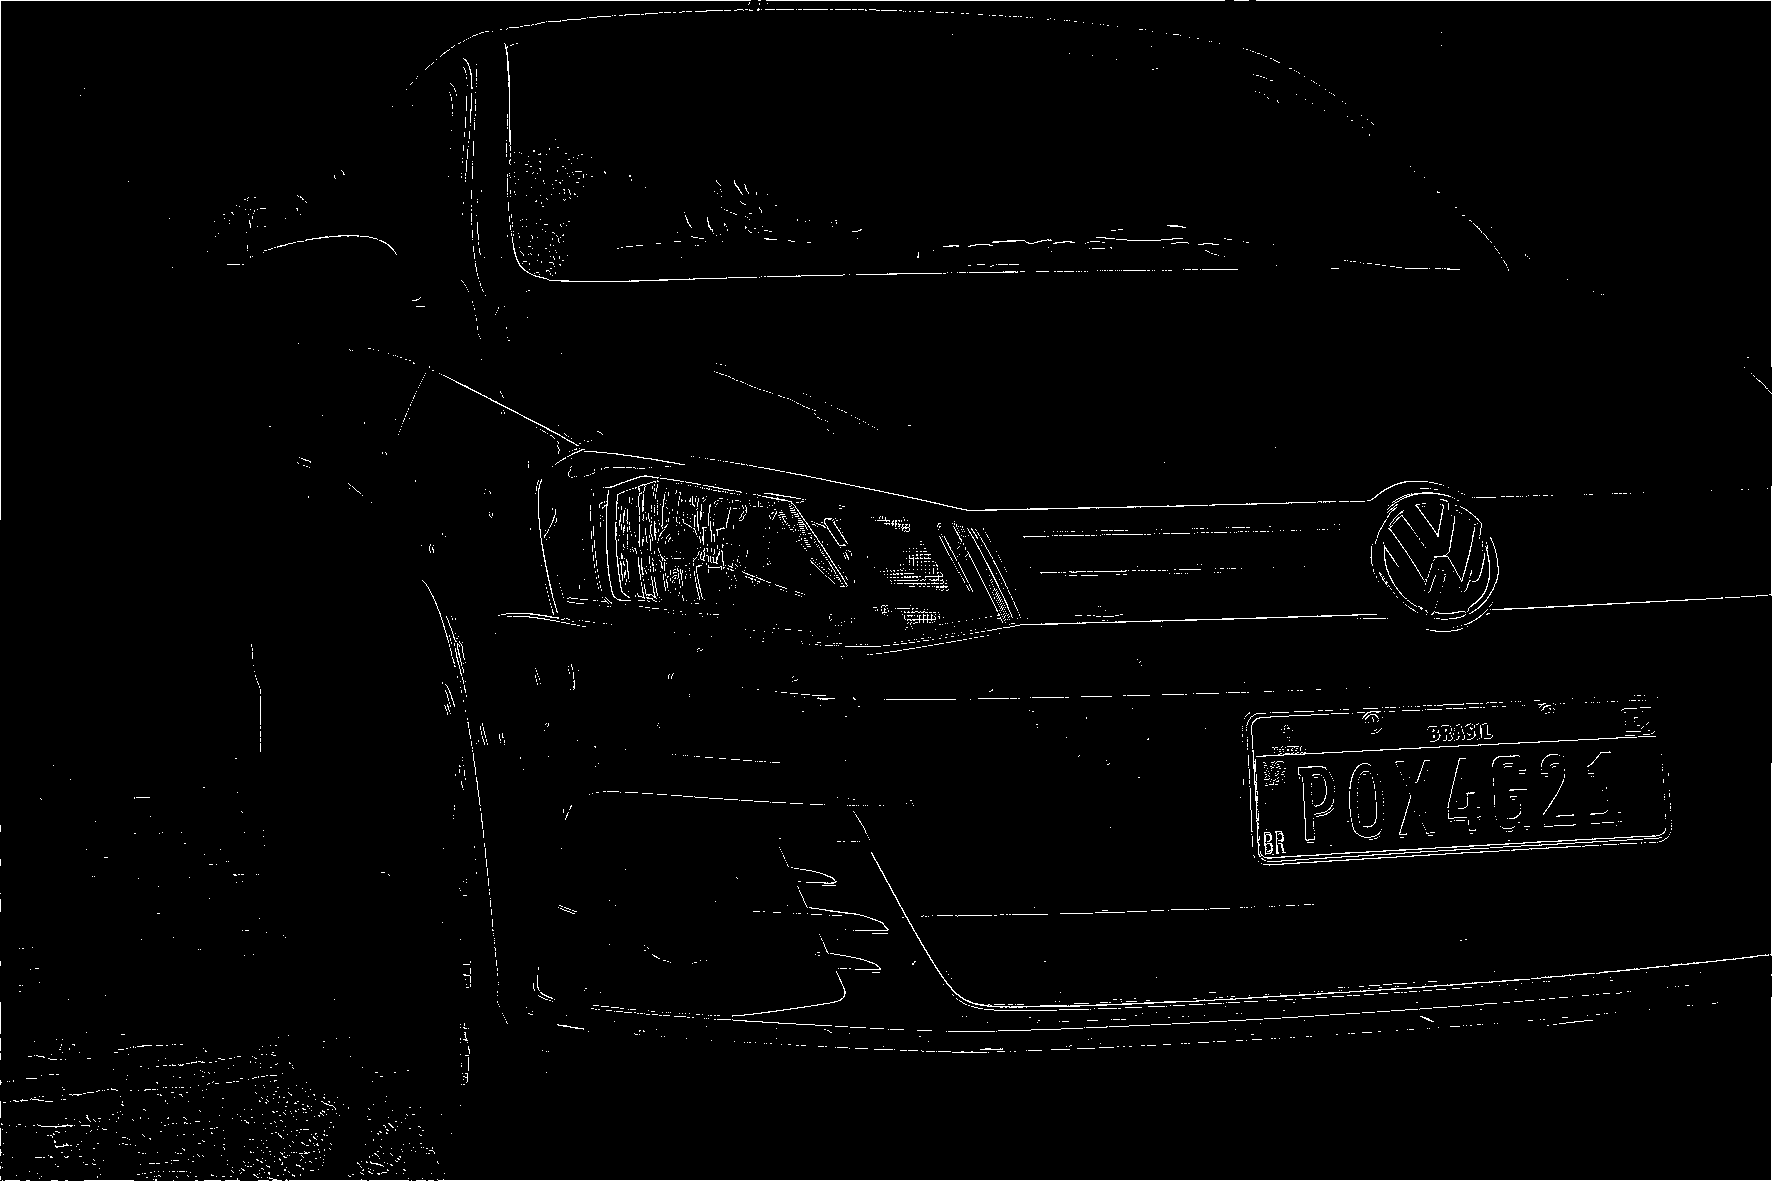

In [15]:
imagem = obter_bordas(caminho)
imagem